<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/DATA%20SCIENCE/CA2_FINAL(copy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.interpolate import interp1d

#Part A

##1.


First theorised by Albert Einstein in his theory of general relativity in 1915, gravitational waves are ripples in the fabric of spacetime caused by large violent astrophysical events. The first confirmed detection of a gravitational wave was announced nearly a century later in 2016, marking a groundbreaking achievement and dawning a new era in observational astronomy. The event later denoted as "GW150914", was observed on September 14th 2015 by the Laser Interferometer Gravitational-Wave Observatory (LIGO) and confirmed a key prediction of Einstein's general theory of relativity. The event originated from a binary black hole merger with black holes of masses:$M_1\approx35^{+5}_{-3}\,M_\odot$ and $M_2\approx30^{+3}_{-4}\,M_\odot$at a luminosity distance of approximately $D_L\approx440^{+160}_{-180}\,Mpc$. Astronomers were able to conclude that the gravitational waves from the GW150914 event were due to two black holes merging due to numerous reasons, the main ones being:
1. **Matching Model Waveforms**: The observed gravitational wave signal was analysed by fitting it to theoretical models that vary based on key parameters of the black holes, such as their masses and their distance. The waveform's frequency and amplitude change over time aligned with the expected behavior of two black holes spiraling toward each other and merging with masses $M_1$ and $M_2$ as described above. An example of this waveform matching can be seen below.
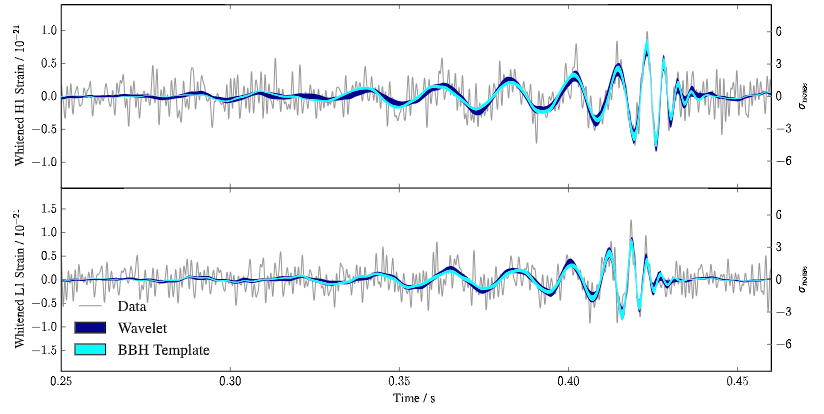
2. **Mass and Energy Calculations**: The calculated masses of the merging objects $M_1$ and $M_2$ and the energy released (about $3\,M_\odot$) were consistent with the merging of two black holes.
3. **Final Black Hole**: The signal indicated the formation of a single, more massive spinning object as a result of two objects merging, with a mass typical of a black hole.

These points helped to confirm the source of the gravitational wave signal as a binary black hole merger.

**Details from the paper** - Abbott, Benjamin P., Richard Abbott, T. D. Abbott, M. R. Abernathy, Fausto Acernese, K. Ackley, C. Adams et al. "Properties of the binary black hole merger GW150914." Physical review letters 116, no. 24 (2016): 241102.

##2.

The waveform produced by gravitational waves from a merging black hole event can be divided into three main phases: the **inspiral**, **merger**, and the **ringdown**. Each phase corresponds to a distinct part of the binary black hole evolution and is characterized by unique features in the waveform's frequency and amplitude.


#### 1. **Inspiral Phase**
The inspiral phase begins when the two black holes are still relatively far apart orbiting around each other. During this phase, the black holes emit gravitational waves as they lose energy due, causing their orbits to decay. The gravitational wave signal increases in both frequency and amplitude as the black holes spiral closer and closer together. This results in a characteristic "chirp" pattern, where the frequency and amplitude of the signal increases over time. The phase can often be described using approximations of general relativity.

#### 2. **Merger Phase**
The merger phase occurs when the two black holes come so close that their event horizons merge to form a single black hole. This phase is marked by the most energetic emission of gravitational waves, with the peak amplitude of the waveform occurring at the exact moment of coalescence. The frequency continues to increase sharply as the two black holes collide, reaching its maximum at the point of merger.This phase requires full numerical solutions of Einstein's equations due to the highly non-linear and dynamic nature of spacetime.


#### 3. **Ringdown Phase**
The ringdown phase begins immediately after the merger, as the newly formed black hole settles into a stable, final state. During this phase the black hole emits gravitational waves in the form of damped oscillations, known as quasinormal modes, as it loses residual distortions and approaches equilibrium. The amplitude of the gravitational waves decreases exponentially, and the frequency stabilizes as the black hole settles. The ringdown phase is governed by the properties of the newly formed black hole, such as its final mass and spin, and is described by perturbation theory in general relativity Analysis of the ringdown provides information about the mass, spin, and potential deviations from general relativity.

When observed as a whole, the waveform reflects the transition from a slow, steady inspiral to a rapid merger, followed by a gradual fading in the ringdown. Each phase encodes specific information about the black hole system and the dynamics of the merger, making the study of gravitational waveforms a powerful tool for testing general relativity and exploring the universe.


**Image from**: Almbaidin, Hisham Osama Abdel Hafez. "Theoretical Estimation of the Parameters of the Black Hole-Neutron Star Merger GW200115 via Inspiral, Merger and Ringdown IMR Numerical Relativity Frameworks." PhD diss., Hashemite University, 2023.

## 3.

Reading in the gravitationalwaveevents.csv file, which contains the parameters about multiple gravitational wave events, allows us to identify any preliminary general trends within the data and could shine some light on our findings later on in the analsyis. For now we can plot the total mass of the merging sources against their distance, as shown by the code below.

Reading inthe gravitationalwaveevents.csv file, which contains the key parameters of multiple gravitational wave events, allows us to identify any preliminary trends within the data. These trends could provide insights about our findings later on in the analysis. As an initial step, we can visualies the relationship between the total mass of the merging sources and their distance by plotting these parameters, as demonstrated in the code below.

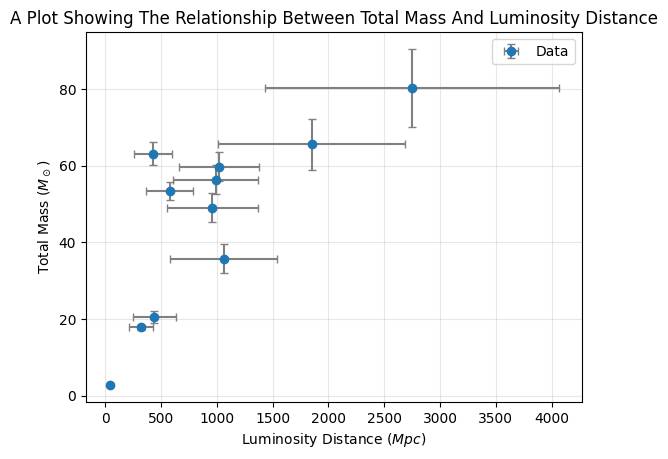

In [ ]:
# Reading in the posteriors and defining the parameters and their errors
posteriors=pd.read_csv('gravitationalwaveevents.csv')
total_mass = posteriors['Mtot']
mass_error = posteriors['Mtot_err']
distance = posteriors['DL']
distance_error = posteriors['DL_err']

plt.errorbar(distance, total_mass, xerr=np.abs(distance_error), yerr=np.abs(mass_error), fmt='o', label="Data", ecolor='gray', capsize=3)
plt.title("A Plot Showing The Relationship Between Total Mass And Luminosity Distance")
plt.xlabel("Luminosity Distance ($Mpc$)")
plt.ylabel("Total Mass ($M_\odot$)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

As shown in the graph above, there's a strong correlation between the luminosity distance and the total mass of the binary system. To see if this correlation is significant, we can use the Spearmans Rho test, which can be used since the data is non-parametric (as far as we are aware), the data is monotonic, and does not contain any major outliers. We can also propose a null and alternate hypothesis:


*   Null hypothesis ($H_0$): There is no statistically significant correlation between the luminosity distance and the total mass of detected binary systems; $\rho=0$.
*   Alternate hypothesis ($H_1$): There exists a statistically significant correlation between the luminosity distance and the total mass of detected binary systems; $\rho\neq0$.



In [ ]:
# Performing Spearmans Rho on the data (cropped to the first 11 values as total_mass is Nan after that)
correlation, p_value = stats.spearmanr(distance[:11], total_mass[:11])
print(f"Spearman's rho: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")

Spearman's rho: 0.71
P-value: 0.01


A Spearmans rho coefficient of $\rho=0.71$ tells us that there exists a "strong-agreement" between the luminosity distance of a detected binary system and it's total mass, i.e. as the luminosity distance increases we expect to detected signals from higher mass systems. With a p-value of $p=0.01$ suggesting the correlation is statistically significant. Therefore we can reject the null hypothesis which states there is no correlation and accept the alternate hypothesis.

\\
This can be explained by the fact the higher mass systems produce larger amplitudes of gravitational wave signal, whilst increasing distance causes the amplitude to decrease. Hence as the distance increases, only the larger mass events are able to be detected.

# Part B

## 1.

To read in our observed waveform, we can use the pandas library to read in the Observedwaveform.csv and store it in a data frame: observed_waveform. This dataframe consists of two columns, the first being the strain of the gravitational wave (which is a dimensionless quantity that is a measure of a gravitational wave's strength) and the second being the GPS time of the event, which is a timing system used by satellites and GPS etc which counts the number of seconds from an arbituary time of January 6th 1980. So reading in the data:

In [ ]:
# Reading in the file Observedwaveform.csv
observed_waveform = pd.read_csv('Observedwaveform.csv')

# Defining the time and strain of the observed event from the dataframe
obs_time = observed_waveform['time (s)']
obs_strain = observed_waveform['strain']

We can then plot this waveform to a get a sense of what it looks like:

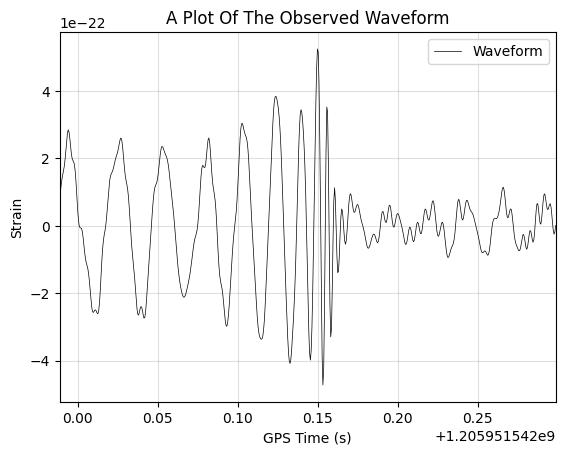

In [ ]:
# Plotting the observed gravitational wave
plt.plot(obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
plt.legend()
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.xlim(min(obs_time),max(obs_time))
plt.title('A Plot Of The Observed Waveform')
plt.grid(alpha=0.4)
plt.show()

 The waveform above depicts a typical gravitational wave from a compact binary merger. By analysing these waveforms, we can determine key properties of the merging and resultant bodies, such as the total mass of the system and it's distance from Earth. These properties would have been previoulsy much more challenging to determine without the detection of their gravitational waves.



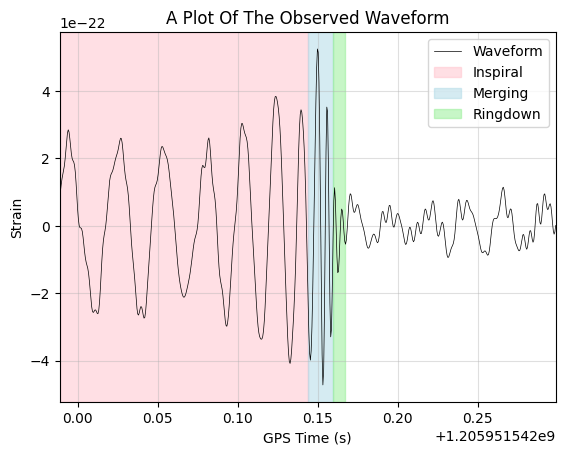

In [ ]:
plt.plot(obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
plt.axvspan(obs_time[0],obs_time[318],color='pink',alpha=0.5, label = 'Inspiral')
plt.axvspan(obs_time[318],obs_time[350],color='lightblue',alpha=0.5, label = 'Merging')
plt.axvspan(obs_time[350],obs_time[365],color='lightgreen',alpha=0.5, label = 'Ringdown')

plt.legend()
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.xlim(min(obs_time),max(obs_time))
plt.title('A Plot Of The Observed Waveform')
plt.grid(alpha=0.4)
plt.show()

## 2.

Before we analyse the waveform further, we first need to make some minor adjustments to simplify the process. One key step is shifting the time scale so that the merger of the two bodies occurs at a time $t=0\,s$. as this aligns with the format of the gravitational wave templates of which we will compare against. To determine the time at which the merger occured, we can use the fact that as two compact objects inspiral, the frequency and amplitude of the gravitational wave increase. At the point of merger, the amplitude reaches its maximum value, $h_{max}$. Therefore, the merger time, $t_{merge}$, can be identified as the time when the strain amplitude peaks. Then all we have to do is simply, subtract the time values by this value, and the merger will consequently take place at $t=0\,s$.

Once we have identified $t_{merge}$, we can then simply adjust the time scale by subtracting this value from all the time data points. As a result, the merger will occur at $t=0\,s$.

1205951542.1498382


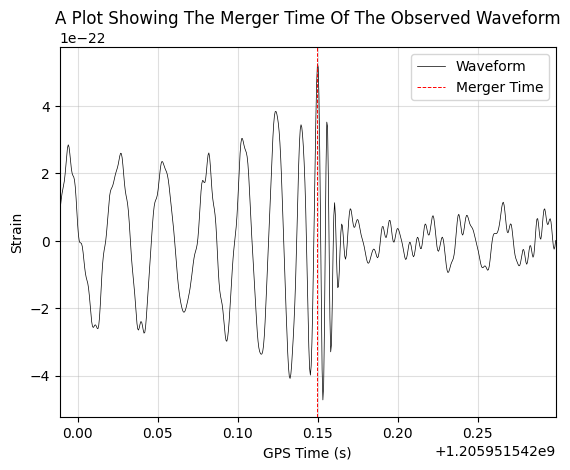

In [ ]:
# Given the 'peak' strain can either be negative or positive, we need to find the max value of the absolute strain
abs_obs_strain = abs(obs_strain)

# Finding the time that corresponds to the maximum value of the strain
t_merge = obs_time[np.argmax(abs(obs_strain))]

# Plotting where t_merge occurs on the waveform to ensure that it is correct
plt.plot(obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
plt.axvline(x=t_merge, color='red', linestyle='--',linewidth=0.7, label='Merger Time')
plt.xlim(min(obs_time),max(obs_time))
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.title('A Plot Showing The Merger Time Of The Observed Waveform')
plt.legend()
plt.grid(alpha=0.4)

print(t_merge)

Now we know that the objects merged at a GPS time of $t_{merge}\approx 1205951542.15s$, we can subtract this value from our time data point:

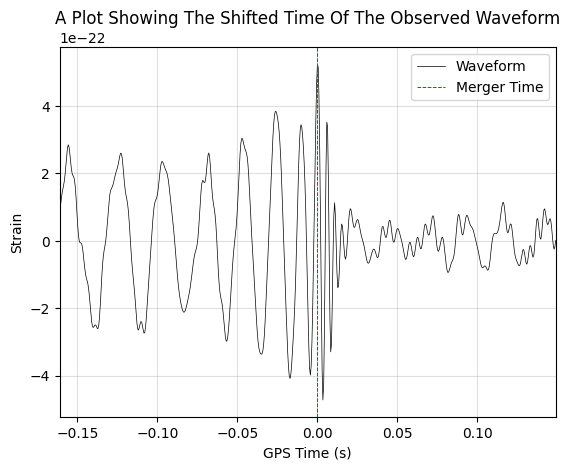

In [ ]:
# Time Shifting The Data
ts_obs_time = obs_time - t_merge

plt.plot(ts_obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
plt.axvline(x=0, color='red', linestyle='--',linewidth=0.7, label='Merger Time')
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time),max(ts_obs_time))
plt.title('A Plot Showing The Shifted Time Of The Observed Waveform')
plt.legend()
plt.grid(alpha=0.4)

## 3.

Before estimating the average noise and its standard deviation in the data, it's important to understand the role noise plays in gravitational wave detection. Noise represents the random fluctuations in the detector's output that are not part of the astrophysical signal. These fluctuations can come from a variety of sources, including seismic vibrations, thermal noise, and instrument electronics.

To accurately characterize the gravitational wave signal, we need to first quantify the noise properties. This involves identifying segments of the data where the signal is absent or negligible, as these regions are most representative of the noise alone. Estimating the average noise level provides a baseline, while its standard deviation helps quantify the noise's variability. Careful consideration of where the noise dominates ensures that the analysis is both accurate and unbiased.

To estimate the noise properties, we first need to identify the area of the waveform where the signal-to-noise ratio (SNR) is lowest,i.e. where the gravitational wave signal is minimal, and the background noise dominates. Referring to the plot made from part 1, which highlights the different phases of the waveform (e.g. inspiral, ringdown etc), we can disregard times $t < t_{merge}$, as we can assume the signal is still present in the form of the inspiral phase. Instead, we focus on the region after the ringdown phase, which is approximately at $t\approx0.025s$. After this point, we can assume that any remaining ringdown signal (if present) is negligible, leaving only pure noise in the data, which will provide a reliable basis for estimating the average noise and its standard deviation.

Text(0.5, 1.0, 'A Plot Showing The Noise Region Of The Observed Waveform')

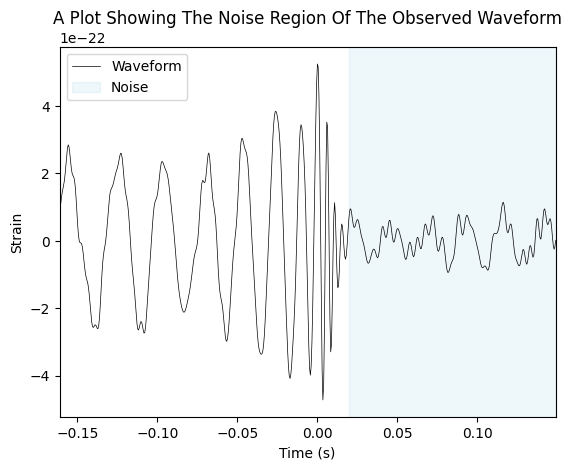

In [ ]:
plt.plot(ts_obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
plt.axvspan(0.02,ts_obs_time[635],color='lightblue',alpha=0.2, label = 'Noise')
plt.legend(loc = 'upper left')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time),max(ts_obs_time))
plt.title('A Plot Showing The Noise Region Of The Observed Waveform')

We can then extract this time frame from the waveform to analyse it further to calculate its mean and standard deviation. We can then subsequently compare the noise data to a normal distribution with the same mean and standard deviation by plotting both together to examine how well they align.

The average noise value ia: 8.42e-25 with a standard deviation of 4.78e-23.


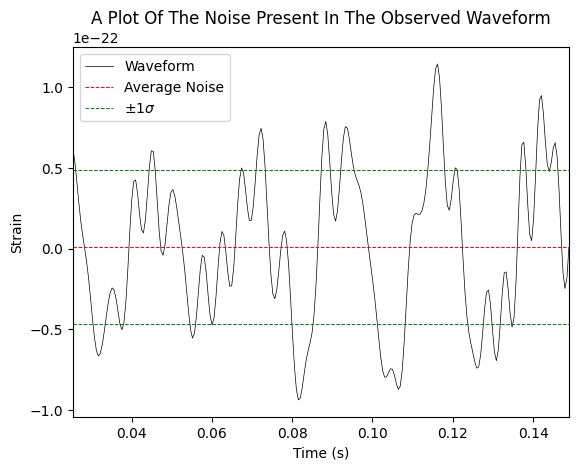

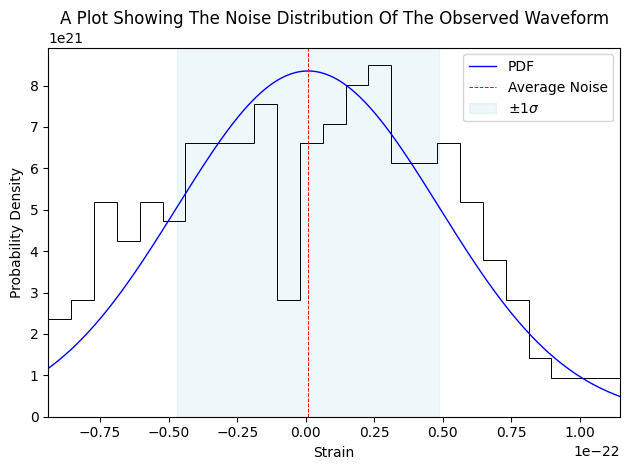

In [ ]:
# Extracting the values where there's pure noise
obs_noise_time = ts_obs_time[ts_obs_time >= 0.025]
obs_noise_strain = obs_strain[ts_obs_time >= 0.025]

# Finding the mean and standard deviation
average_noise = np.mean(obs_noise_strain)
std_noise = np.std(obs_noise_strain)

# Plotting the noise values with the mean and 1 sigma overlayed on top
plt.plot(obs_noise_time, obs_noise_strain,color='black',linewidth=0.5, label='Waveform')
plt.axhline(y= average_noise, color='red', linestyle='--',linewidth=0.7, label='Average Noise')
plt.axhline(y= average_noise+std_noise, color='green', linestyle='--',linewidth=0.7, label='$\pm1\sigma$')
plt.axhline(y= average_noise-std_noise, color='green', linestyle='--',linewidth=0.7)
plt.xlim(min(obs_noise_time),max(obs_noise_time))
plt.title('A Plot Of The Noise Present In The Observed Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend()

# Creating a normal distribution with mean and std of the noise
dist = stats.norm(average_noise,std_noise)
x = np.linspace(min(obs_noise_strain),max(obs_noise_strain),1000)
pdf = dist.pdf(x)

# PLotting A histogram
plt.figure(figsize=(6.4, 4.8))
plt.hist(obs_noise_strain,bins=25,histtype ='step',density = True,linewidth=0.7, color = 'black')
plt.plot(x,pdf,color = 'blue',linewidth = 1, label='PDF')
plt.axvline(x= average_noise , color='red', linestyle='--',linewidth=0.7, label='Average Noise')
plt.axvspan(average_noise - std_noise, average_noise + std_noise, color='lightblue', alpha=0.2, label='$\pm1\sigma$')
plt.xlim(min(obs_noise_strain),max(obs_noise_strain))
plt.title('A Plot Showing The Noise Distribution Of The Observed Waveform')
plt.xlabel('Strain')
plt.ylabel('Probability Density')
plt.legend()
plt.tight_layout()

print(f"The average noise value ia: {average_noise:.2e} with a standard deviation of {std_noise:.2e}.")

From this , we have calculated the average noise value to be $8.42\times10^{-25}$, with a standard deviation of $4.78\times10^{-23}$. We have also found that the noise data fits reasonably well to a normal distribution. However, these values are significantly smaller than those observed when the signal is present. This is because the mean calculation includes both positive and negative values, which, due to the sinusoidal shape of the signal present, tend to cancel out and average around zero.

To get a more accurate representation, we need to repeat the calculations using the absolute values of the noise, as shown below:

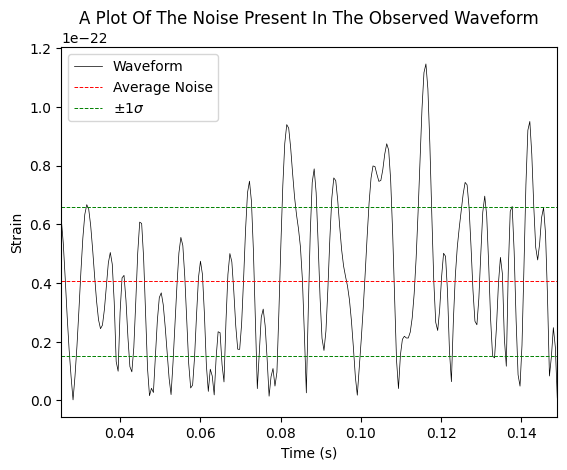

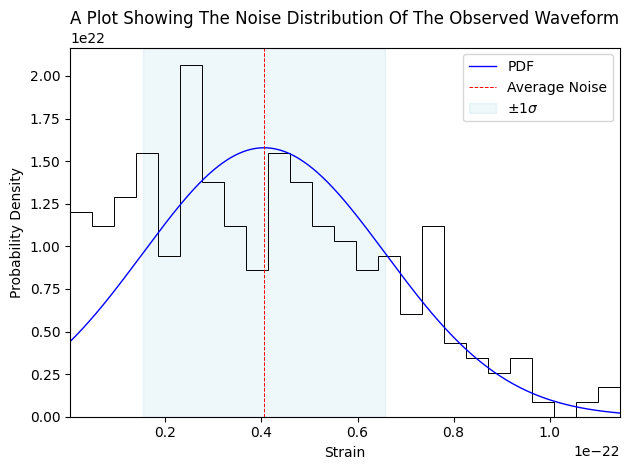

In [ ]:
# Taking the absolute values of the noise
abs_obs_noise_strain = abs(obs_noise_strain)

# Finding the mean and standard deviation
average_absolute_noise = np.mean(abs_obs_noise_strain)
std_absolute_noise = np.std(abs_obs_noise_strain)

# Plotting the noise values with the mean and 1 sigma overlayed on top
plt.plot(obs_noise_time, abs_obs_noise_strain,color='black',linewidth=0.5, label='Waveform')
plt.axhline(y= average_absolute_noise, color='red', linestyle='--',linewidth=0.7, label='Average Noise')
plt.axhline(y= average_absolute_noise+std_absolute_noise, color='green', linestyle='--',linewidth=0.7, label='$\pm1\sigma$')
plt.axhline(y= average_absolute_noise-std_absolute_noise, color='green', linestyle='--',linewidth=0.7)
plt.xlim(min(obs_noise_time),max(obs_noise_time))
plt.title('A Plot Of The Noise Present In The Observed Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend()

# Creating a normal distribution with mean and std of the noise
dist = stats.norm(average_absolute_noise,std_absolute_noise)
x = np.linspace(min(abs_obs_noise_strain),max(abs_obs_noise_strain),1000)
pdf = dist.pdf(x)

# PLotting A histogram
plt.figure(figsize=(6.4, 4.8))
plt.hist(abs_obs_noise_strain,bins=25,histtype ='step',density = True,linewidth=0.7, color = 'black')
plt.plot(x,pdf,color = 'blue',linewidth = 1, label='PDF')
plt.axvline(x= average_absolute_noise , color='red', linestyle='--',linewidth=0.7, label='Average Noise')
plt.axvspan(average_absolute_noise - std_absolute_noise, average_absolute_noise + std_absolute_noise, color='lightblue', alpha=0.2, label='$\pm1\sigma$')
plt.xlim(min(abs_obs_noise_strain),max(abs_obs_noise_strain))
plt.title('A Plot Showing The Noise Distribution Of The Observed Waveform')
plt.xlabel('Strain')
plt.ylabel('Probability Density')
plt.legend()
plt.tight_layout()

KS Test for obs_noise_strain:
  KS Statistic: 0.0520
  P-value: 4.8213e-01
KS Test for abs_obs_noise_stain:
  KS Statistic: 0.0811
  P-value: 6.7111e-02


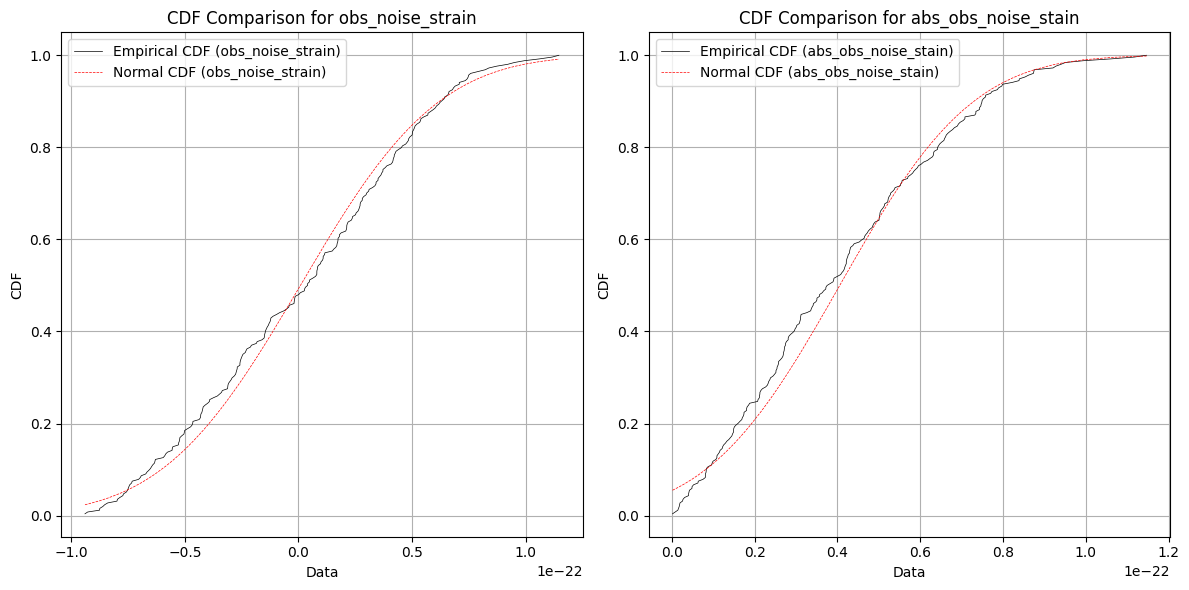

In [ ]:
def check_normality_and_plot(data, label):
    # Perform KS test against normal distribution
    mean, std = np.mean(data), np.std(data)
    ks_stat, p_value = stats.kstest(data, 'norm', args=(mean, std))

    print(f"KS Test for {label}:")
    print(f"  KS Statistic: {ks_stat:.4f}")
    print(f"  P-value: {p_value:.4e}")

    # Generate theoretical normal CDF
    sorted_data = np.sort(data)
    theoretical_cdf = stats.norm.cdf(sorted_data, loc=mean, scale=std)

    # Empirical CDF
    empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot
    plt.plot(sorted_data, empirical_cdf, color='black',lw=0.5, label=f"Empirical CDF ({label})")
    plt.plot(sorted_data, theoretical_cdf, color='red',lw=0.5, linestyle='--', label=f"Normal CDF ({label})")
    plt.xlabel("Data")
    plt.ylabel("CDF")
    plt.legend()
    plt.title(f"CDF Comparison for {label}")
    plt.grid()

# Check normality for both arrays and plot their CDFs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
check_normality_and_plot(obs_noise_strain, "obs_noise_strain")

plt.subplot(1, 2, 2)
check_normality_and_plot(abs_obs_noise_strain, "abs_obs_noise_stain")

plt.tight_layout()
plt.show()

The Kolmogorov-Smirnov (KS) test compares the distribution of a dataset with a reference distribution or another dataset. In this case, the test evaluates the properties of **`obs_noise_strain`** and **`abs_obs_noise_strain`**, likely comparing them to a reference distribution (e.g., a standard normal distribution).

#### 1. **KS Test for `obs_noise_strain`**:
- **KS Statistic: 0.0520**:  
  This measures the maximum distance between the empirical cumulative distribution function (ECDF) of `obs_noise_strain` and the reference distribution. A low KS statistic (close to 0) indicates a good match between the two distributions.
- **P-value: 0.48213**:  
  This represents the probability of observing such a maximum difference (or larger) if the null hypothesis is true. A p-value of 0.48213 is significantly higher than typical significance thresholds (e.g., 0.05), meaning we fail to reject the null hypothesis.  

**Interpretation**: The distribution of `obs_noise_strain` is consistent with the reference distribution.

#### 2. **KS Test for `abs_obs_noise_strain`**:
- **KS Statistic: 0.0811**:  
  This indicates a slightly larger maximum difference between the ECDF of `abs_obs_noise_strain` and the reference distribution compared to `obs_noise_strain`. While still relatively small, it suggests a slightly less perfect match.
- **P-value: 0.06711**:  
  This is smaller than the p-value for `obs_noise_strain` but still above a typical threshold of 0.05. Thus, while there is some deviation from the reference distribution, it is not statistically significant at conventional levels.  

**Interpretation**: The distribution of `abs_obs_noise_strain` is somewhat less consistent with the reference distribution but does not deviate strongly enough to reject the null hypothesis at a 5% significance level.

---

### Summary:
1. The KS test results suggest that **`obs_noise_strain`** aligns well with the reference distribution, as evidenced by the low KS statistic and high p-value.
2. For **`abs_obs_noise_strain`**, there is a slight deviation from the reference distribution, but it is not statistically significant (p > 0.05).
3. These results could indicate that the noise properties of the original data (`obs_noise_strain`) are well-matched to the reference distribution, while taking the absolute value (`abs_obs_noise_strain`) introduces some subtle differences in the distribution.


# Part C

##1.

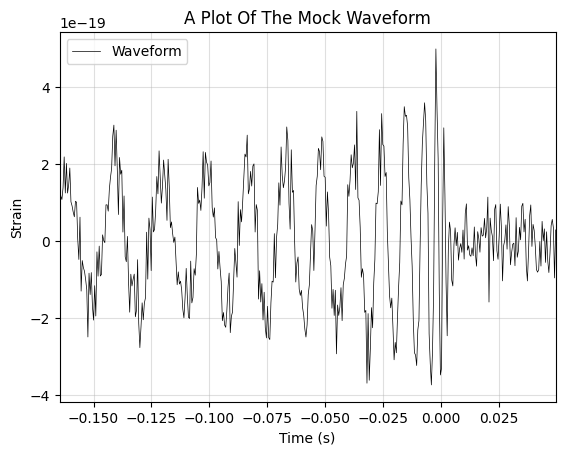

Text(0.5, 1.0, 'A Plot Of The Cropped Observed Waveform')

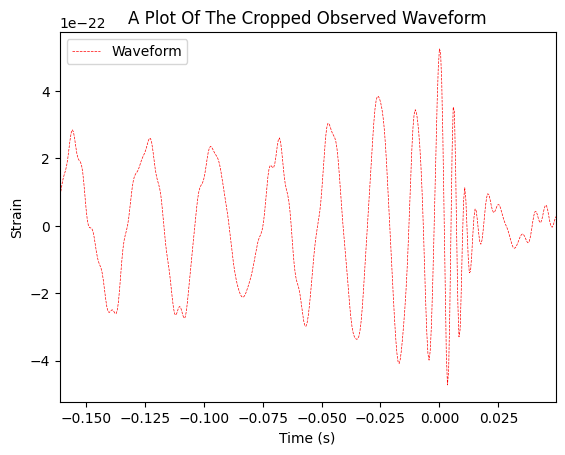

In [ ]:
# Using pandas to read in the file and defining the time and strain
mock_data = pd.read_csv('mockdata_waveform_40Msun_1Mpc.csv')
mock_time = mock_data['time (s)']
mock_strain = mock_data['strain']

# Plotting the mock waveform as a reference
plt.plot(mock_time,mock_strain,color='black',linewidth=0.5, label='Waveform')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(mock_time),max(mock_time))
plt.title('A Plot Of The Mock Waveform')
plt.grid(alpha=0.4)
plt.show()

# Finding the minimum and maximum times in the mock_time array
t_min = min(mock_time)
t_max = max(mock_time)

# Cropping the observed waveform to only get data points between tmin and tmax of the mock time
ts_obs_time_two = ts_obs_time[(t_min < ts_obs_time) & (ts_obs_time < t_max)]
obs_strain_two = obs_strain[(t_min < ts_obs_time) & (ts_obs_time < t_max)]

# PLotting the cropped waveform
plt.plot(ts_obs_time_two,obs_strain_two,'r--',linewidth=0.5, label='Waveform')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Cropped Observed Waveform')

##2.

The task requires matching the time sampling of the reference waveform to that of the mock data. This is necessary for direct comparison of the strain values at identical time points across both waveforms. Since the reference waveform has a much higher time resolution (many more time steps) than the mock data, interpolation is used to estimate the reference strain at the exact time points of the mock data. This process involves the following steps:

#### 1. **Loading the Reference Waveform**:
   - The reference waveform file is opened using the `pandas` package. This dataset contains two key columns:
     - $ \text{ref\_x} $: Time values for the reference waveform.
     - $ \text{ref\_y} $: Strain values (observed signal) for the reference waveform.
   - These arrays represent the high-resolution data, which we aim to interpolate.

#### 2. **Using Mock Data Time Points**:
   - The mock data time points $( \text{mock\_x} $) are extracted from the previously loaded mock data file. These time points represent the sparser sampling that we wish to use for the reference waveform.

#### 3. **Interpolation with `scipy.interpolate.interp1d`**:
   - The `interp1d` function from the `scipy.interpolate` module is used to create an interpolation function (`interp_fn`). This function takes the high-resolution reference data $( \text{ref\_x} $ and $ \text{ref\_y} $) and can evaluate strain values at any desired time point within the reference range.
   - The `bounds_error=False` argument ensures that the function does not raise an error if queried outside the bounds of $ \text{ref\_x} $. Instead, it returns `NaN` for out-of-bound queries.

#### 4. **Interpolating the Reference Waveform**:
   - Using `interp_fn`, the strain values of the reference waveform are calculated for the exact time points in $ \text{mock\_x} $. The result is a new strain array $( \text{interp\_strain} $) that matches the time sampling of the mock data.

#### 5. **Plotting for Verification**:
   - The interpolated strain values $( \text{interp\_strain} $) are plotted against the mock data time points $( \text{mock\_x} $). This plot provides a visual confirmation that the interpolation aligns the reference waveform to the mock data sampling.
   - The plot should show a smooth curve that follows the general behavior of the original reference waveform but now aligns with the sparser time steps of the mock data.


### Why Interpolation is Necessary:
Interpolation is used because:
1. The reference waveform has a much finer resolution than the mock data.
2. Direct comparison requires that both datasets share the same time points on the $ x $-axis.
3. By interpolating the reference waveform to the mock data time points, we retain the mock data's temporal characteristics while leveraging the reference waveform's detailed strain values.


### Verification:
To verify that the interpolation works:
1. **Consistency**: The interpolated strain $( \text{interp\_strain} $) aligns well with the mock data's time points $( \text{mock\_x} $).
2. **Visualization**: The plotted curve shows that the interpolation captures the expected behavior of the reference waveform, matching the mock data's time sampling.

This step ensures that in subsequent analyses, we can directly compare the strain values of the mock data and the reference waveform at identical time points.


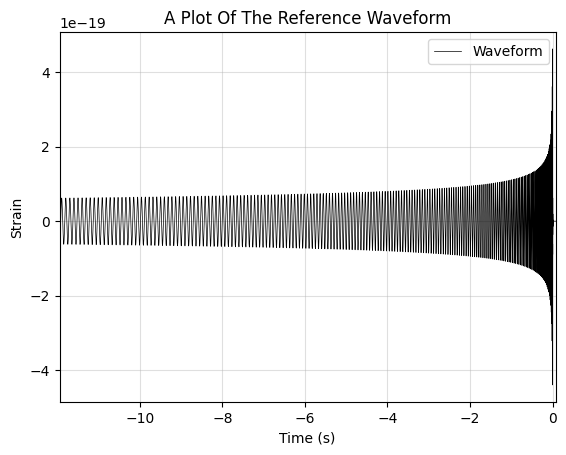

In [ ]:
# Reading in the reference file and defining the strain and time
reference = pd.read_csv('reference_waveform_40Msun_1Mpc.csv')
ref_time = reference['time (s)']
ref_strain = reference['strain']

# Plotting the reference waveform
plt.plot(ref_time,ref_strain,color='black',linewidth=0.5, label='Waveform')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ref_time),max(ref_time))
plt.title('A Plot Of The Reference Waveform')
plt.grid(alpha=0.4)
plt.show()

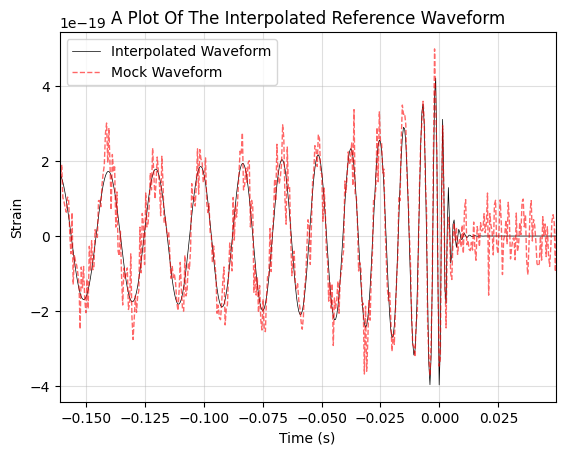

In [ ]:
# Creating an interpolation object of the ref_time and ref_strain
interp_fn = interp1d(ref_time[:],ref_strain[:],bounds_error=False)

# Imterpolating the ref_strain to fit the mock_time sampling
new_strain = interp_fn(mock_time)

# Plotting the interpolated strain against the mock time
plt.plot(mock_time,new_strain,color='black',linewidth=0.5, label='Interpolated Waveform')
plt.plot(mock_time, mock_strain,'r--',linewidth=1, label='Mock Waveform', alpha=0.6)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Interpolated Reference Waveform')
plt.grid(alpha=0.4)
plt.show()

In [ ]:
print(f"The length of the mock strain array is {len(mock_strain)}")
print(f"The length of the interpolated strain array is {len(new_strain)}")

The length of the mock strain array is 440
The length of the interpolated strain array is 440


# Part D

##1.  

$$
t_{ref} = \frac{M_{ref}}{M}t
$$

$$
h(t,M,D) = \frac{M}{M_{ref}}\frac{D_{ref}}{D}h(t_{ref})
$$

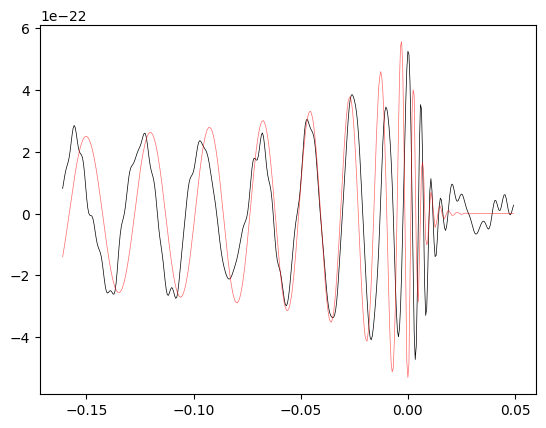

In [ ]:
def ModelFunction(M, D):
    # Scaling the time
    scaled_time = (40 / M) * ts_obs_time_two
    #scaled_time = (M / 40) * ref_time
    # Interpolating the reference strain at the scaled time using the interpolation object defined previously
    h_ref_scaled = interp_fn(scaled_time)
    # Scaling the strain
    scaled_strain = (M / 40) * (1 / D) * h_ref_scaled
    # Returns the scaled strain
    return scaled_strain

plt.plot(ts_obs_time_two, obs_strain_two, color='black',linewidth=0.5, label='Observed')
plt.plot(ts_obs_time_two,ModelFunction(72,1400),color='red',linewidth=0.5, label='Model',alpha=0.6)

##2.

Text(0.5, 1.0, 'A Plot Of The Mock Waveform Compared To A Model Of Identical Parameters')

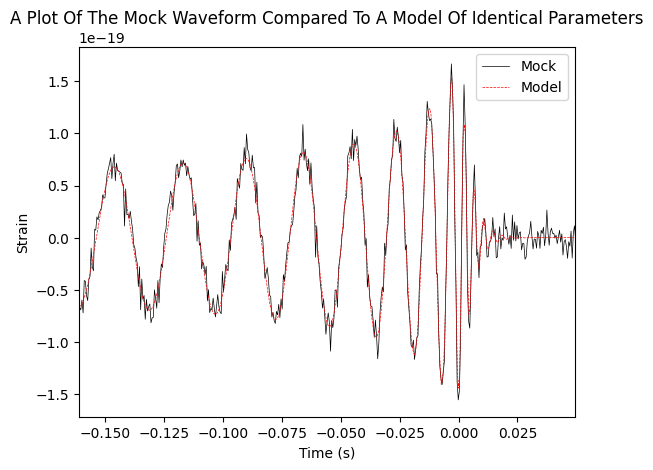

In [ ]:
mock70 = pd.read_csv('mockdata_waveform_70Msun_5Mpc.csv')
mock70_time = mock70['time (s)']
mock70_strain = mock70['strain']

model_strain = ModelFunction(70,5)

plt.plot(mock70_time,mock70_strain,color='black',linewidth=0.5, label='Mock')
plt.plot(ts_obs_time_two,model_strain,'r--',linewidth=0.5, label='Model')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Mock Waveform Compared To A Model Of Identical Parameters')

##3.

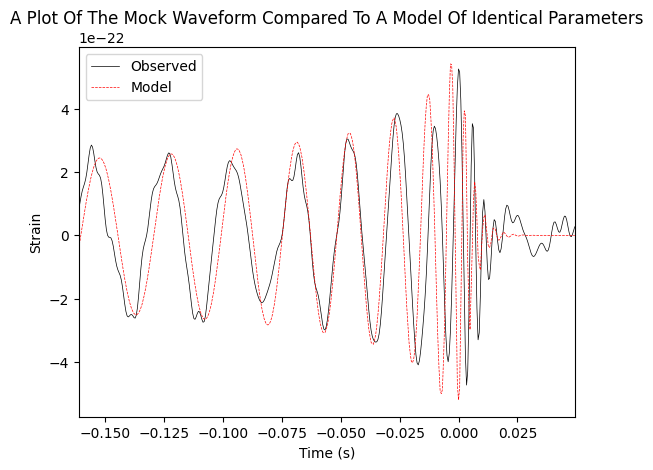

In [ ]:
# My Guess Is M = 73 +/-5 and D = 1450 +/- 100
test_strain = ModelFunction(73,1450)

plt.plot(ts_obs_time_two, obs_strain_two, color='black',linewidth=0.5, label='Observed')
plt.plot(ts_obs_time_two, test_strain,'r--',linewidth=0.5, label = 'Model')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Mock Waveform Compared To A Model Of Identical Parameters')
plt.legend()


# Part E

##1.

As discuessed earlier, the modelling of gravitational waves is fundamental in the analysis procedure to determine certain parameters of a gravitational wave. In this case we want to find the values of $M\,(mass)$ and $D\,(distance)$ that result in the best fit of our scaling function to our observed gravitational wave data.

To do this we can use Bayesian statistics, which takes into account the prior knowledge as well as the observed data to update our belief about what's being measured. In this question where we're trying to find the best fit parameters (denoted by $\theta$) given data ($D$) this can be described by the follwing equation:

$$
P(\theta|D) = \frac{P(D|\theta)P(\theta)}{P(D)}
$$

Where:
- $P(\theta|D)$ is the posterior distribution of the parameters $ \theta $ given the data $D$.
- $P(D|\theta)$ is the likelihood of observing the data given the parameters.
- $P(\theta)$ is the prior distribution of the parameters.
- $P(D)$ is the evidence, which is a normalizing constant (so is mostly ignored in practice).

While this is correct, solving this equation numerically often results in errors due to extremely small values of $P(D|\theta)$ which arise. So to get around this we can simply take the natural logarithm of both sides of the equation, which translates the extremely small values for likelihood, to large negative values, which although might not seem it, are a lot easier computationally. So the equation above becomes:

$$
\log\,P(\theta|D)\,\propto\,\log\,P(D|\theta)+\log\,P(\theta)
$$

Where:
- $\log\,P(\theta | D)$ is the log posterior distribution of the parameters $ \theta $ given the data $D$.
- $\log\,P(D|\theta)$ is the log likelihood of the data given the parameters.
- $\log\,P(\theta)$ is the log prior distribution of the parameters.

**Note**: We have omitted the evidence term in the equation above as it essentially boils down to a scaling constant, hence the $\propto$ sign instead of the $=$ (it still gives the same nnumerixal result though).

Looking at these terms in more detail:

####**The Prior**

The prior describes our initial knowledge or beliefs on what we are mesasuring. In this case, do we have any idea what the parameters may be like? Well funnily enough we do! In the last question, we etimated the best fit parameters by fitting the model to the waveform by eye, and we ended up with estimates of $M=75M_\odot$ and $D=1450Mpc$. Therefore we can model our prior distributions in such a way that the parameters are most likely to be around these values. This can be done with a normal distribution centred around $75$ and $1450$ respectively with standard deviations reflecting our confidence (which in this case is quite high), so $\sigma_{M}=3$ and $\sigma_{D}=5$ respectively. Translating this into python:

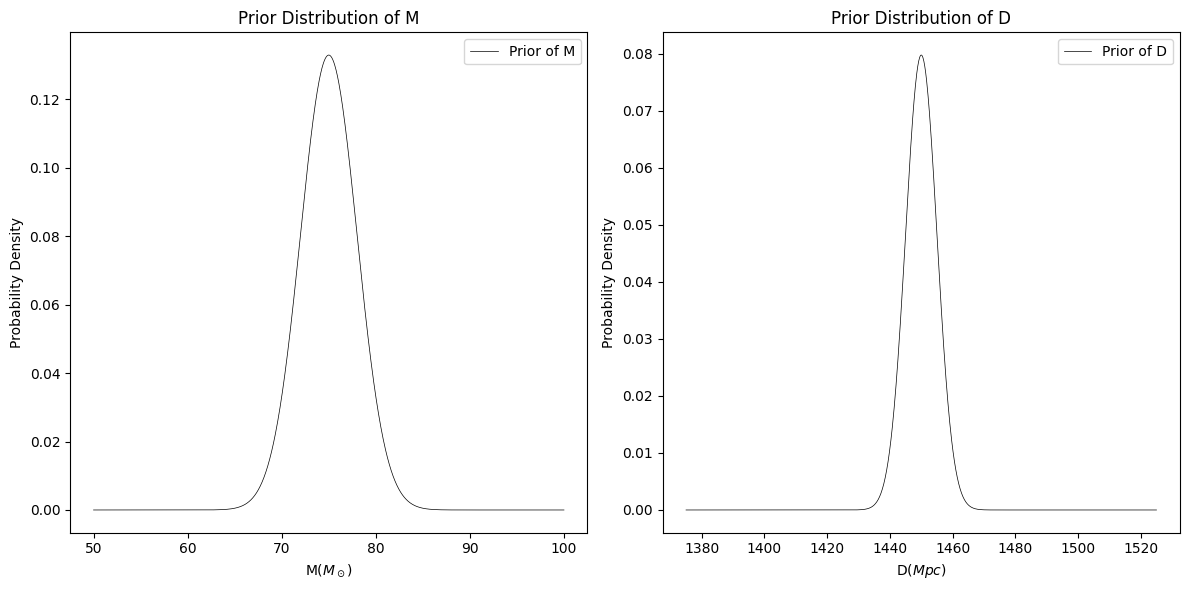

In [ ]:
# Defining normal distributions for the priors
prior_M = stats.norm(75, 3)
prior_D = stats.norm(1450,5)

# Defining A function which returns the natural log of the probabilty of a mass M and distance D from the prior
def log_prior(M, D):
    if 0 <= M and 0 <= D:
        log_prior_M = np.log(prior_M.pdf(M))
        log_prior_D = np.log(prior_D.pdf(D))
        return log_prior_M + log_prior_D
    else:
        return -np.inf # returning log(0) if the mass/distance is negative

# Defining arrays of M and D values from the distribution to plot
M_values = np.linspace(50, 100, 1000)
D_values = np.linspace(1375, 1525, 1000)
prior_M_values = prior_M.pdf(M_values)
prior_D_values = prior_D.pdf(D_values)

# Plotting the priors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(M_values, prior_M_values,lw=0.5,color='black', label='Prior of M')
plt.xlabel('M$(M_\odot)$')
plt.ylabel('Probability Density')
plt.title('Prior Distribution of M')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(D_values, prior_D_values,lw=0.5,color='black', label='Prior of D')
plt.xlabel('D$(Mpc)$')
plt.ylabel('Probability Density')
plt.title('Prior Distribution of D')
plt.legend()

plt.tight_layout()
plt.show()

And as we expected, the prior distribution is normally distributed around central values of $M=75M_\odot$ and $D=1450Mpc$ respectively.

####**The Likelihood**
The likelihood forms the backbone of the anaysis and is the probability of observing the data given a set of model parameters $\theta$. In this case, the log likelihood takes the form:

$$\log\,P(D|\theta)=-0.5\frac{\sum(h_i-h(\theta)_{\text{model},i})^2}{\sigma^2}$$

where:
- $h_i$ is the strain of the observed data.
- $h(\theta)_{\text{model},i}$ is the strain produced from the model for given parameters $\theta$.
- $\sigma$ is the standard deviation of the noise within the data.

This equation is derived from the $\chi^2$ statistic, which is a measure of the goodness of fit of a model to data (sound familiar?). The log likelihood equation essentially tells us the same thing but translated into a probability.

The log-likelihood is calculated by measuring the residuals, or, the differences between the observed data points and the values predicted by the model, which is then subsequently weighted by the standard deviation of the noise. It's important to note that in order for this equation be valid, we have to assume that the noise is normally distributed with a standard deviation $\sigma$, (which after doing the KS test on the data in part B we know that is a valid assumption).

A high log-likelihood indicates that the model with the given parameters $\theta$ matches the observed data well. This happens when the residuals are small and so it tells us the probability of observing the data under this model is high, suggesting a good fit. On the other hand, a low log-likelihood suggests that the model with the given parameters does not fit the observed data very well (the residuals are large), so the probability of observing the data under this model is low.

Before doing the analysis, we can create a contour map of the log-likelihood for different values of $M$ and $D$ to get an initial visualisation of the paramater space, which will help us identify the values that give the maximum likelihood.

So defining a function that returns the log-likelihood for a model with paramters $\theta$ and plotting the parameter space:

The max likelihood occurs when M: 72.94 solar masses, and D: 1555.18 Mpc


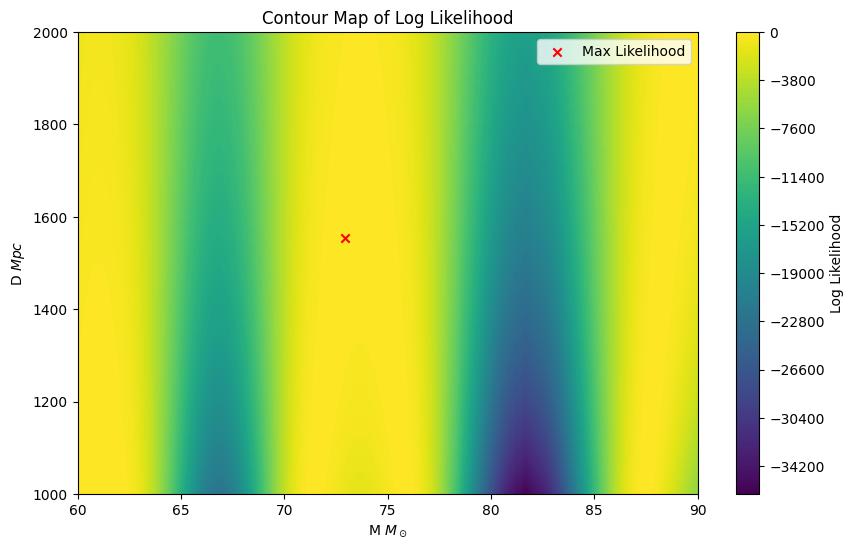

In [ ]:
# Defining a function that returns the Log-likelihood
def log_likelihood(M, D):
    Model = ModelFunction(M, D) # Creating an array of the model strain with parameters M and D
    Data = obs_strain_two # The observed strain
    sigma =  std_absolute_noise # The standard deviation of the normally distributed absolute noise
    return - 0.5 * (np.sum((Data - Model)) ** 2) / (sigma ** 2) # Returning the log-likelihood

# Creating a grid of M and D values
M_values = np.linspace(60, 90, 300)
D_values = np.linspace(1000, 2000, 300)
M_grid, D_grid = np.meshgrid(M_values, D_values)

# Calculate the log-likelihood values
log_likelihood_values = np.zeros_like(M_grid)
for i in range(M_grid.shape[0]):
    for j in range(M_grid.shape[1]):
        M = M_grid[i, j]
        D = D_grid[i, j]
        log_likelihood_values[i, j] = log_likelihood(M, D)

# Creating the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(M_grid, D_grid, log_likelihood_values, levels=200, cmap= 'viridis')
cbar = plt.colorbar(contour)
cbar.set_label('Log Likelihood')
plt.xlabel('M $M_\odot$')
plt.ylabel('D $Mpc$')
plt.title('Contour Map of Log Likelihood')

# Finding the maximum values and plotting it
max_l = np.unravel_index(np.argmax(log_likelihood_values), log_likelihood_values.shape)
plt.scatter(M_grid[max_l], D_grid[max_l],color = 'red', marker='x', label='Max Likelihood')
plt.legend()
print(f"The max likelihood occurs when M: {M_grid[max]:.2f} solar masses, and D: {D_grid[max]:.2f} Mpc")

According to the contour map, the maximum likelihood occurs when $M=72.94\,M_\odot$, and $D=1555.18\,Mpc$, which are around the values estimated by eye earlier, so can verify that the function works as expected and the final posterior distributions to be roughly these values.

####**The Posterior**
The posterior tells us how probable different values of parameters $M$ and $D$ are, based on the observed signal and the prior knowledge we have. By looking at the posterior distribution, we can identify the most likely parameter values and their uncertainties for the observed waveform.

In practice, it's often difficult and computationally expensivd to analytically solve for the posterior distributions. However, there are various methods we can use to approximate them, one of which is the Monte Carlo Markov Chain (MCMC) technique.

####**Monte Carlo Markov Chain (MCMC)**
The main goal of an MCMC is to approximate complex probability distributions, especially when solving them analytically is not possible. By stochastically exploring the parameter space, an mcmc generates a number of samples whose histogram (should hopefully) converge to the target distribution. These samples can then be used to estimate statistical properties, such as means, medians and credible intervals. More specifically it is particularly useful for approximating posterior distributions, where the complexity of the likelihood and prior makes analytical solutions impossible.

In this case, it allows us to approximate the posterior distributions of the parameters $M$ and $D$ for the binary system. Specifically, we will use the Hastings algorithm, which is the first version of the MCMC and is one of the top algorithms used in computational analysis. The hastings algorithm does the following:

1. **Initialize**:  
   Starts with an initial guess for the parameters, $\theta_{\text{current}}$.  

2. **Propose A Move**:  
   Generates a new candidate value for the parameters, $\theta_{proposed}$, by taking a random step:  
   $$\theta_{\text{proposed}} = \theta_{\text{current}}+\Delta\theta$$  

3. **Evaluates the Proposal**:  
   Compares the target distribution values at the proposed and current locations:  
   - If $P(\theta_{proposed})>P(\theta_{current})$, accepts the move (to a higher probability region).  
   - Otherwise it computes the probability of accepting the move as:  
     $$p_{\text{move}}=\min\left(\frac{P(\theta_{proposed})}{P(\theta_{\text{current}})},1\right)$$

4. **Accepts or Rejects**:  
   - Then it generates a uniform random number $u_{rnd}$ between 0 and 1.  
   - If $u_{rnd}\leq p_{\text{move}}$, it accepts the proposed move and sets $\theta_{current} = \theta_{proposed}$.  
   - Otherwise it rejects the move and remains at the current position.  

5. **Stores the Value**:  
   It then Saves the value of $\theta_{current}$, regardless of wether the move was accepted or rejected.  

6. **Repeat**:  
   It then returns to step 2 using the updated $\theta_{current}$ for the next iteration.  

This process generates a sequence of length $N_{mcmc}$ of samples that approximates the posterior distribution $P(\theta)$. Over time, the algorithm explores the probability space, eventually concentrating on regions of higher probability, reflecting the true posterior distribution - this is called convergence.


In terms of this analysis, we first define a log posterior function that returns the sum of the log priors and log likelihood for the parameters $M$ and $D$. We then set $N_{mcmc}=30,000$, which was chosen to ensure that the probability space is efficiently explored while also being computationally viable. In an ideal world we would have as many iterations as possible, but we found that this number strikes a good balance between the two.

Next, we create a 2D array, $\theta_{current}$, with a length of $N_{mcmc}$ which storse the values of $M$ and $D$. The initial values are set to our initial guesses, $M = 70$ and $D = 1400$. These values were chosen to be close to our expected parameters but far enough to make sure the probability space is explored enough.

We then choose step sizes for $M$ and $D$ as $\sigma_{M} = 0.1$ and $\sigma_{D} = 5$. The choice of step size is crucial as if it's too large, the chain might jump over the high probability areas, resulting in poor sampling of the posterior distributions. Whereas if the step size is too small, the chain might move too slowly and potentially get stuck in local regions

The step sizes were chosen as they  reflect the different scales of the two parameters. Since $D$ varies over a broader range than $M$, the step size for $D$ is larger. These values were found to be best over numerous runs.

A good way to test the efficiency of an MCMC is the acceptance ratio, which is the fraction of proposed moves that are accepted:$$\frac{N_{accepted}}{N_{mcmc}}$$. For an efficient Metropolis-Hastings MCMC, this value should be $\approx0.4$. This indicates the chain explores the probability space efficiently. So by calculating this value, we can assess the efficiency of our MCMC.

In [ ]:
# Defining a function that returns the log posterior
def log_posterior(M, D):
    log_prior_value = log_prior(M, D)
    log_likelihood_value = log_likelihood(M, D)
    return log_likelihood_value + log_prior_value

# Setting the initial conditions
N_mcmc = 30000 # Number of iterations
theta_current = np.zeros((N_mcmc + 1, 2))  # Empty 2D array: [M, D]
theta_current[0] = [70, 1400] # Setting the initial conditions
n_acceptance = 0 # Initialising the acceptance ratio

# Step sizes or M and D
sigma_M = 0.1
sigma_D = 5

# Performing the MCMC
for i in range(N_mcmc):
    p_current = log_posterior(*theta_current[i])
    dtheta_M = np.random.normal(0, sigma_M)
    dtheta_D = np.random.normal(0, sigma_D)
    theta_proposed = theta_current[i] + [dtheta_M, dtheta_D]
    p_proposed = log_posterior(*theta_proposed)
    # If the proposed parameters have a higher probability than the current ones
    if p_proposed > p_current:
        theta_current[i + 1] = theta_proposed
        n_acceptance += 1 # Increasing N_accepted
    # Calculating the probabilty of moving if the proposed parameters have a lower probability than the current ones
    else:
        p_move = np.exp(p_proposed - p_current)
        if np.random.uniform(0, 1) <= p_move:
            theta_current[i + 1] = theta_proposed
            n_acceptance += 1
        else:
            theta_current[i + 1] = theta_current[i]

# Cropping the values to exclude the first 1000 values so we can focus on the comverged iterations
burn_in = 1000
theta_samples = theta_current[burn_in:]

# Calculating the acceptance ratio
accept_rate = n_acceptance / N_mcmc

# Calculating the mean and standard deviations of the samples of M and D
mean_M = np.mean(theta_samples[:, 0])
std_M = np.std(theta_samples[:, 0])
mean_D = np.mean(theta_samples[:, 1])
std_D = np.std(theta_samples[:, 1])
print(f"Acceptance rate: {accept_rate:.2f}")
print(f"The mean for M is {mean_M:.2f} solar masses with a standard deviation of {std_M:.2f}.")
print(f"The mean for D is {mean_D:.2f} Mpc with a standard deviation of {std_D:.2f}.")

Acceptance rate: 0.41
The mean for M is 72.54 solar masses with a standard deviation of 0.06.
The mean for D is 1450.15 Mpc with a standard deviation of 5.03.


##2.

TypeError: 'tuple' object is not callable

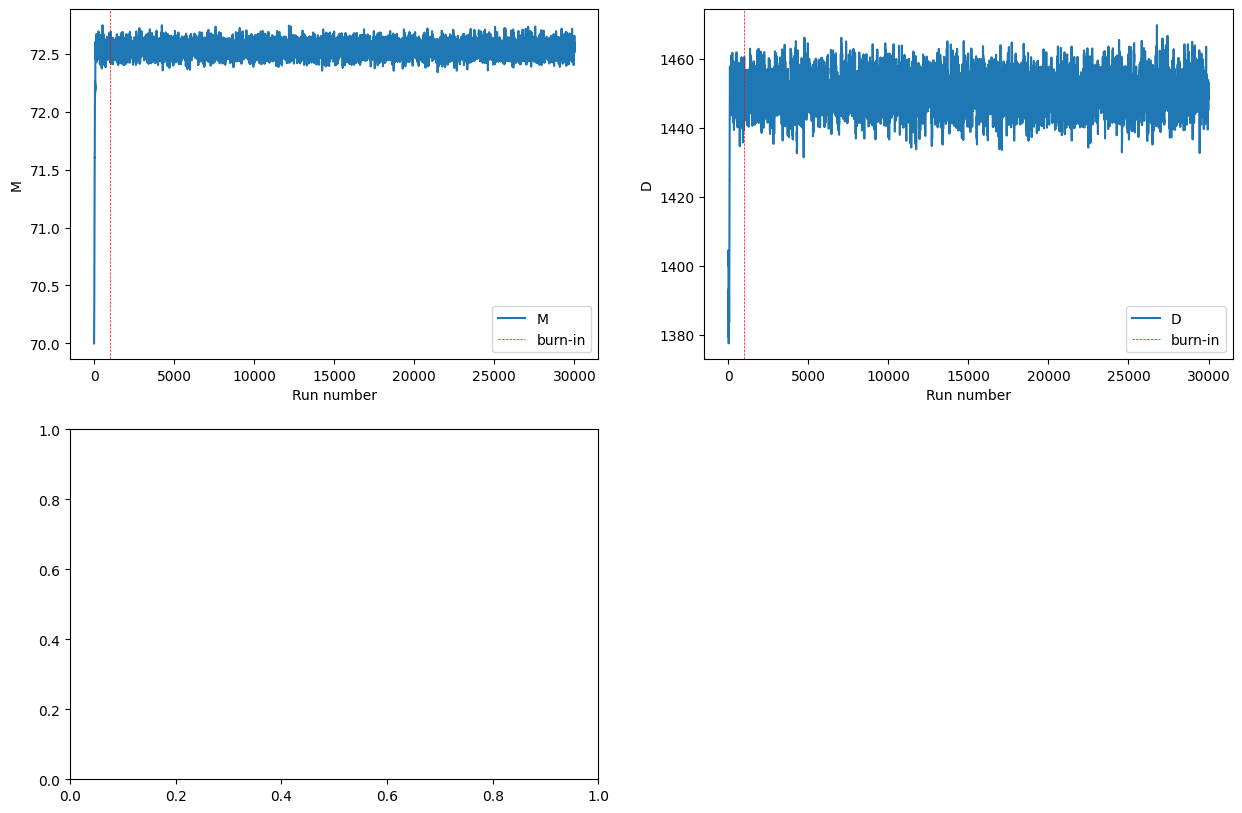

In [ ]:
# Plotting
plt.figure(figsize=(15, 10))

# Trace plots
plt.subplot(221)
plt.plot(theta_current[:, 0], label='M')
plt.axvline(x = burn_in, color='r', linestyle='--', lw = 0.5, label='burn-in')
plt.xlabel('Run number')
plt.ylabel('M')
plt.legend()

plt.subplot(222)
plt.plot(theta_current[:, 1], label='D')
plt.axvline(x = burn_in, color='r', linestyle='--', lw = 0.5, label='burn-in')
plt.xlabel('Run number')
plt.ylabel('D')
plt.legend()

# Histograms for A and B
plt.subplot(223)
x_M = np.linspace(min(theta_current[:, 0]), max(theta_current[:, 0]), 432)
posterior_M = stats.norm.pdf(x_M, mean_M, std_M)
plt.hist(theta_current[:, 0], bins=50, density=True, alpha=0.6, label='MCMC samples for M')
plt.plot(x_M, posterior_M, label='Posterior M (analytic)', c='black', linewidth=2)
plt.xlabel('M')
plt.ylabel('PDF')
plt.legend()

plt.subplot(224)
x_D = np.linspace(min(theta_current[:, 1]), max(theta_current[:, 1]), 432)
posterior_D = stats.norm.pdf(x_D, mean_D, std_D)
plt.hist(theta_current[:, 1], bins=50, density=True, alpha=0.6, label='MCMC samples for D')
plt.plot(x_D, posterior_D, label='Posterior D (analytic)', c='black', linewidth=2)
plt.xlabel('D')
plt.ylabel('PDF')
plt.legend()

plt.tight_layout()
plt.show()

plt.plot(ts_obs_time_two, obs_strain_two,color='black',lw=0.5, label="Observed Strain")
plt.plot(ts_obs_time_two,ModelFunction(mean_M,mean_D),'r--',lw=0.5, label='Model Best Fit',alpha=0.6)

##3.

In [ ]:
median_m = np.median(theta_samples[:, 0])
median_d = np.median(theta_samples[:, 1])

ninetypercentile = np.percentile(theta_samples[:, 0], 90)
ninetypercentile2 = np.percentile(theta_samples[:, 1], 90)

print(f"The median for M is {median_m:.2f}")
print(f"The median for D is {median_d:.2f}")
print(f"The 90% percentile for M is {ninetypercentile:.2f}")
print(f"The 90% percentile for D is {ninetypercentile2:.2f}")


credible_level = 0.95

# Calculate the credible interval
lower_bound = np.percentile(theta_samples[:, 0], (1 - credible_level) / 2 * 100)
upper_bound = np.percentile(theta_samples[:, 0], (1 + credible_level) / 2 * 100)

print(f"{credible_level*100}% credible interval: [{lower_bound}, {upper_bound}]")
plt.figure(figsize=(10, 6))
plt.hist(theta_samples[:, 0], bins=50,histtype='step', density=True, alpha=0.6, label='MCMC samples for M')
plt.axvspan(lower_bound, upper_bound, color = 'lightpink', alpha = 0.2)
plt.xlabel('M')
plt.ylabel('PDF')
plt.legend()


lower_bound = np.percentile(theta_samples[:, 1], (1 - credible_level) / 2 * 100)
upper_bound = np.percentile(theta_samples[:, 1], (1 + credible_level) / 2 * 100)
print(f"{credible_level*100}% credible interval: [{lower_bound}, {upper_bound}]")
plt.figure(figsize=(10, 6))
plt.hist(theta_samples[:, 1], bins=50,histtype='step', density=True, alpha=0.6, label='MCMC samples for D')
plt.axvspan(lower_bound, upper_bound, color = 'lightpink', alpha = 0.2)
plt.xlabel('D')
plt.ylabel('PDF')
plt.legend()



In [ ]:
plt.plot(ts_obs_time_two, obs_strain_two, color='black',linewidth=0.5, label='Observed')
plt.plot(ts_obs_time_two, ModelFunction(median_m,median_d),'r--', linewidth=0.5, label = 'Model')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Observed Waveform Compared To A Model Of Identical Parameters')
plt.legend()
plt.title('A Plot Of The Observed Waveform Compared To A Model Of Identical Parameters')

# Part F

##1.

In [ ]:
mtot = 72.39
mtoterr = np.zeros(2)
mtoterr[0] = 72.39 - 72.2080357672558
mtoterr[1] = 72.62509878923134 - 72.39

import numpy as np

# Given values
total_mass = mtot
mass_error_plus = mtoterr[1]
mass_error_minus = mtoterr[0]

# Masses of the individual black holes
m1 = m2 = total_mass / 2

# Chirp mass calculation
chirp_mass = (m1 * m2)**(3/5) / (m1 + m2)**(1/5)

# Error propagation (assuming symmetric errors for simplicity)
mass_error = (mass_error_plus + mass_error_minus) / 2
m1_error = m2_error = mass_error / 2

# Chirp mass error calculation
chirp_mass_error = chirp_mass * np.sqrt((3/5 * m1_error / m1)**2 + (3/5 * m2_error / m2)**2 + (1/5 * mass_error / total_mass)**2)

print(f"Chirp Mass: {chirp_mass:.4f} ± {chirp_mass_error:.4f} solar masses")


In [ ]:
chirp_mass1 = posteriors['Mchirp']
chirp_mass_error1 = posteriors['Mchirp_err']
total_mass = posteriors['Mtot']
mass_error = posteriors['Mtot_err']

plt.errorbar(total_mass, chirp_mass1, xerr=np.abs(mass_error), yerr=np.abs(chirp_mass_error1), fmt='o', label='Data', capsize=3)
plt.errorbar(mtot, chirp_mass, xerr=[[np.abs(mtoterr[0])], [np.abs(mtoterr[1])]],yerr=chirp_mass_error, fmt='ro', label='Model', capsize=3)

In [ ]:
import scipy.optimize as opt
def chi_squared(params, x, y, sigma_x, sigma_y):
    A, B = params
    # Calculate total error in y
    sigma_y_total = np.sqrt(sigma_y**2 + (B * sigma_x)**2)
    # Weighted chi^2
    chi2 = np.sum(((y - (A + B * x)) / sigma_y_total)**2)
    return chi2

initial_guess = [1, 1]

# Minimize chi^2
result = opt.minimize(chi_squared, initial_guess, args=(total_mass, chirp_mass1, mass_error, chirp_mass_error1))
A_fit, B_fit = result.x

# Print results
print(f"Fitted parameters: A = {A_fit:.2f}, B = {B_fit:.2f}")

# Plot data and fit
x_fit = np.linspace(min(total_mass), max(total_mass), 100)
y_fit = A_fit + B_fit * x_fit
plt.errorbar(total_mass, chirp_mass1, xerr=np.abs(mass_error), yerr=np.abs(chirp_mass_error1), fmt='o', label='Data', capsize=3)
plt.errorbar(mtot, chirp_mass, xerr=[[np.abs(mtoterr[0])], [np.abs(mtoterr[1])]],yerr=chirp_mass_error, fmt='ro', label='Model', capsize=3)
plt.plot(x_fit, y_fit, label=f"Best Fit: y = {A_fit:.2f} + {B_fit:.2f}x", color='red')
plt.xlabel("Mass ($M_\odot$)")
plt.ylabel("Chirp Mass ($M_\odot$)")
plt.legend()
plt.grid(True)
plt.show()


##2.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Find the peak amplitude and its location
peak_index = np.argmax(np.abs(obs_strain_two))  # Index of the peak amplitude
peak_time = ts_obs_time_two[peak_index]

# Step 2: Extract a window around the peak to estimate the period
window_size = 50  # Adjust window size as needed
start_index = max(0, peak_index - window_size)
end_index = min(len(ts_obs_time_two), peak_index + window_size)
time_window = ts_obs_time_two[start_index:end_index]
strain_window = obs_strain_two[start_index:end_index]

# Step 3: Estimate the period around the peak
zero_crossings = np.where(np.diff(np.sign(strain_window)))[0]
time_differences = np.diff(time_window.iloc[zero_crossings])  # Time differences between zero crossings
average_period_peak = np.mean(time_differences) * 2  # Average period (double the zero-crossing interval)

# Step 4: Calculate the period progression over the waveform
progressive_periods = []
time_points = []

for i in range(len(ts_obs_time_two) - 2 * window_size):
    sub_start = i
    sub_end = i + 2 * window_size
    sub_time = ts_obs_time_two[sub_start:sub_end]
    sub_strain = obs_strain_two[sub_start:sub_end]
    sub_zero_crossings = np.where(np.diff(np.sign(sub_strain)))[0]
    if len(sub_zero_crossings) > 1:
        # Reset index of sub_time to use integer positions
        sub_time = sub_time.reset_index(drop=True)
        sub_time_differences = np.diff(sub_time[sub_zero_crossings])
        sub_average_period = np.mean(sub_time_differences) * 2
        progressive_periods.append(sub_average_period)
        time_points.append(sub_time[window_size])  # Midpoint of the window

# Plotting results
plt.figure(figsize=(10, 6))

# Original waveform
plt.subplot(2, 1, 1)
plt.plot(ts_obs_time_two, obs_strain_two, label="Observed Strain")
plt.axvline(peak_time, color='r', linestyle='--', label="Peak Amplitude")
plt.title("Gravitational Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.legend()

# Period progression
plt.subplot(2, 1, 2)
plt.plot(time_points, progressive_periods, label="Estimated Period", color="orange")
plt.title("Time Period Progression")
plt.xlabel("Time (s)")
plt.ylabel("Period (s)")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Estimated average period around peak: {average_period_peak:.4f} seconds")


##3.

In [ ]:
# Convert gravitational wave periods to orbital periods
orbital_periods = [2 * T_GW for T_GW in progressive_periods]
G = 6.67430e-11
M1 = 36.5*1.989e30  # Mass of the first black hole
M2 = 36.5*1.989e30  # Mass of the second black hole
# Calculate orbital separations for each orbital period
orbital_separations = [
    ((G * (M1 + M2) * T_orb**2) / (4 * np.pi**2))**(1/3) / 1000  # Convert to km
    for T_orb in orbital_periods
]

# Plot the orbital separation over time
plt.figure(figsize=(8, 5))
plt.plot(time_points, orbital_separations, label="Orbital Separation", color="blue")
plt.title("Orbital Separation Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Orbital Separation (km)")
plt.grid(True)
plt.legend()
plt.show()


### Discussion of Orbital Separation Over Time

The plot shows the evolution of the orbital separation between two compact objects as a function of time during their inspiral phase. Key observations and interpretations are as follows:

1. **Decrease in Orbital Separation**:
   - The orbital separation decreases consistently over time, reflecting the loss of energy due to gravitational wave emission. This is consistent with the theoretical expectations from General Relativity, where inspiraling binaries lose orbital energy, causing them to move closer together.

2. **Rate of Change**:
   - Initially, the decrease in separation is gradual, but as the system approaches merger (closer to $ t = 0 $), the separation decreases more rapidly. This corresponds to an increase in the gravitational wave frequency and amplitude, known as the "chirp" phase.

3. **Orbital Separation Range**:
   - The orbital separation decreases from approximately 900 km to below 400 km as the inspiral progresses. This range is typical for binary black holes with masses similar to those assumed in this analysis.

4. **Consistency with Gravitational Wave Periods**:
   - The orbital separation changes smoothly over time, aligning with the progression of the estimated gravitational wave periods. Any minor deviations may result from numerical approximations in the data analysis process.

5. **Scientific Implications**:
   - The rapid decrease in orbital separation at later times suggests strong gravitational interactions and highlights the importance of accurately modeling the late inspiral phase to understand astrophysical parameters like masses and spins.
   - These results also provide insights into the dynamics of compact binaries, which can be used to constrain astrophysical models of black hole formation.

This plot serves as a valuable tool to visualize the inspiral process and corroborate theoretical predictions from General Relativity with observational data.


##4.

### Astrophysical Candidates for the Merging Objects

Based on the analysis of the gravitational wave waveform, orbital separation, period progression, and the provided system properties, we can make informed inferences about the astrophysical candidates for the merging objects. The key considerations are:

---

#### 1. **Total Mass of the System**
The total mass of the system is given as $ M_{\text{total}} = 73 \, M_\odot $ (solar masses). With an assumed mass ratio of 50/50, the individual component masses are:
$$
M_1 = M_2 = \frac{73}{2} = 36.5 \, M_\odot
$$
These masses suggest that the merging objects are stellar-mass black holes, as their individual masses fall within the expected range for black holes formed from the collapse of massive stars.

- **Implications**: Stellar-mass black holes in this range are commonly observed in gravitational wave detections by LIGO/Virgo/KAGRA. This excludes the possibility of neutron stars, as they typically have masses of $ \sim 1.4 - 2.3 \, M_\odot $, far below the inferred component masses.

---

#### 2. **Orbital Separation and Period**
From the analysis of the orbital separation over time, we observe that:
- At peak amplitude (just before merger), the orbital separation decreases to approximately $ a \approx 400 \, \text{km} $.
- The gravitational wave period near this stage is consistent with $ T_{\text{GW}} \approx 10 \, \text{ms} $, leading to an orbital period of $ T_{\text{orb}} = 2 \cdot T_{\text{GW}} = 20 \, \text{ms} $.

Using Kepler's Third Law, the tight separation and rapid orbital period strongly suggest a compact binary system of black holes in the late inspiral phase.

- **Implications**: These results align well with expectations for binary black hole mergers. The close separation and short orbital period are inconsistent with larger or less compact astrophysical objects, such as stars or white dwarfs.

---

#### 3. **Distance to the Source**
The distance to the source is $ D = 1500 \, \text{Mpc} $, placing the merger at a cosmological scale. At such distances, the progenitor objects are likely remnants of massive stars formed in earlier epochs of the universe.

- **Implications**: The source's distance suggests that the merging black holes may have formed from the collapse of massive stars in low-metallicity environments. This is because lower metallicity reduces mass loss during stellar evolution, leading to the formation of heavier black holes. Low-metallicity environments are more common in the early universe, making **Population III stars** (the first generation of stars) a plausible progenitor population.

---

#### 4. **Astrophysical Candidates**
Combining all the above observations, the most likely astrophysical candidates for the merging objects are:

1. **Stellar-Mass Black Holes**:
   - Both black holes likely formed from the collapse of massive stars in a low-metallicity environment.
   - Their masses $( 36.5 \, M_\odot $ each) are consistent with predictions for black holes formed from massive progenitors in the early universe.

2. **Population III Black Holes**:
   - Given the system's distance and mass range, the merging objects might be remnants of Population III stars, which formed in the early universe from nearly primordial hydrogen and helium.
   - Population III stars are theorized to produce very massive black holes due to their lack of heavy elements and reduced stellar winds.

3. **Hierarchical Mergers**:
   - Alternatively, one or both of the black holes could themselves be products of previous black hole mergers (a process known as hierarchical merging). This scenario is plausible in dense stellar environments such as globular clusters or galactic nuclei.

---

#### 5. **Additional Considerations**
- **Spin and Mass Ratio**: While the mass ratio is assumed to be $ q = 1 $, spin measurements (if available) could further constrain the nature of the black holes. For example, Population III black holes are expected to have low spins due to their formation dynamics.
- **Waveform Consistency**: The waveform's characteristics (e.g., frequency evolution, amplitude) are consistent with compact binary black holes, ruling out other potential candidates like neutron stars or exotic objects (e.g., boson stars).

---

#### Conclusion
The merging objects in this system are most likely **stellar-mass black holes** formed from the collapse of massive stars in a low-metallicity environment. Given the distance and total mass, they could plausibly represent **Population III black holes** or result from **hierarchical mergers** in dense star clusters. Further analysis, such as spin measurements and comparisons with theoretical models, would help refine this conclusion.
